1 – Data Preparation

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
data_path = r'C:\Users\kalki\OneDrive\Desktop\week3\insurance-risk-analytics-week3\data\MachineLearningRating_v3.csv'
df = pd.read_csv(data_path, sep='|')

# Subset for severity model: only rows with claims > 0
df_severity = df[df['TotalClaims'] > 0].copy()

# Handle missing values (example: fill numerical NaNs with 0)
df_severity.fillna(0, inplace=True)

# Feature engineering: example, vehicle age
df_severity['VehicleAge'] = 2025 - df_severity['RegistrationYear']

# Encode categorical variables (example: one-hot encoding for 'Gender' and 'VehicleType')
df_model = pd.get_dummies(df_severity, columns=['Gender', 'VehicleType'], drop_first=True)

# Define X and y for claim severity
X = df_model.drop(columns=['TotalClaims', 'CalculatedPremiumPerTerm'])  # drop target and premium
y = df_model['TotalClaims']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\kalki\AppData\Local\Temp\ipykernel_24228\1925894047.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='|')
C:\Users\kalki\AppData\Local\Temp\ipykernel_24228\1925894047.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_severity.fillna(0, inplace=True)


In [6]:
print(X_train.head())

        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
191385                32486      2419  2015-06-01 00:00:00            False   
487085               113296      7685  2014-12-01 00:00:00            False   
714126               139463     11507  2015-03-01 00:00:00            False   
38476                126032      6641  2015-02-01 00:00:00            False   
95322                123395     10423  2015-03-01 00:00:00            False   

       Citizenship   LegalType Title Language           Bank      AccountType  \
191385              Individual    Mr  English      ABSA Bank  Savings account   
487085              Individual    Mr  English        Nedbank  Savings account   
714126              Individual    Mr  English  Standard Bank  Savings account   
38476               Individual    Mr  English      ABSA Bank  Current account   
95322               Individual    Mr  English      ABSA Bank  Current account   

        ... TotalPremium VehicleAge Ge

In [7]:
print(y_train.head())

191385     1361.403509
487085     6140.350877
714126     1403.508772
38476     16121.245614
95322       750.649123
Name: TotalClaims, dtype: float64


In [8]:
print(X_train.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'VehicleAge', 'Gender_Female', 'Gender_Male', 'Gender_Not specified', 'VehicleType_Bus', 'VehicleType_Heavy Commercial', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle']


In [10]:
# Check missing values
missing_counts = X_train.isnull().sum()
missing_percent = (missing_counts / X_train.shape[0]) * 100
missing_summary = pd.DataFrame({'MissingCount': missing_counts, 'MissingPercent': missing_percent})
print(missing_summary[missing_summary['MissingCount'] > 0])

# Impute numerical features with median
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if X_train[col].isnull().sum() > 0:
        X_train[col].fillna(X_train[col].median(), inplace=True)
        X_test[col].fillna(X_train[col].median(), inplace=True)

# Impute categorical features with 'Unknown'
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
for col in categorical_cols:
    if X_train[col].isnull().sum() > 0:
        X_train[col].fillna('Unknown', inplace=True)
        X_test[col].fillna('Unknown', inplace=True)

# Verify all missing values are handled
print("Remaining missing values:", X_train.isnull().sum().sum())


Empty DataFrame
Columns: [MissingCount, MissingPercent]
Index: []
Remaining missing values: 0


2 – Feature Engineering & Encoding

In [15]:
print(X_train.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'VehicleAge', 'Gender_Female', 'Gender_Male', 'Gender_Not specified', 'VehicleType_Bus', 'VehicleType_Heavy Commercial', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle']


In [20]:
# Columns to encode (only those present in X_train)
categorical_cols = ['Province', 'Bank', 'AccountType', 'CoverType']

# Use pandas get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Make sure both train and test have the same columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Replace X_train and X_test with encoded versions
X_train = X_train_encoded
X_test = X_test_encoded

print(X_train.shape)
print(X_train.head())


(2230, 83)
        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
191385                32486      2419  2015-06-01 00:00:00            False   
487085               113296      7685  2014-12-01 00:00:00            False   
714126               139463     11507  2015-03-01 00:00:00            False   
38476                126032      6641  2015-02-01 00:00:00            False   
95322                123395     10423  2015-03-01 00:00:00            False   

       Citizenship   LegalType Title Language  MaritalStatus       Country  \
191385              Individual    Mr  English  Not specified  South Africa   
487085              Individual    Mr  English  Not specified  South Africa   
714126              Individual    Mr  English  Not specified  South Africa   
38476               Individual    Mr  English  Not specified  South Africa   
95322               Individual    Mr  English  Not specified  South Africa   

        ...  AccountType_Transmission account

3 — Model Building

In [23]:
# Convert TransactionMonth to year and month numeric columns
X_train['TransactionYear'] = pd.to_datetime(X_train['TransactionMonth']).dt.year
X_train['TransactionMonthNum'] = pd.to_datetime(X_train['TransactionMonth']).dt.month
X_test['TransactionYear'] = pd.to_datetime(X_test['TransactionMonth']).dt.year
X_test['TransactionMonthNum'] = pd.to_datetime(X_test['TransactionMonth']).dt.month

# Drop original string/datetime columns
X_train = X_train.drop(columns=['TransactionMonth'])
X_test = X_test.drop(columns=['TransactionMonth'])


In [24]:
non_numeric = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric)


Non-numeric columns: ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'MaritalStatus', 'Country', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'Gender_Female', 'Gender_Male', 'Gender_Not specified', 'VehicleType_Bus', 'VehicleType_Heavy Commercial', 'VehicleType_Light Commercial', 'VehicleType_Medium Commercial', 'VehicleType_Passenger Vehicle', 'Province_Free State', 'Province_Gauteng', 'Province_KwaZulu-Natal', 'Province_Limpopo', 'Province_Mpumalanga', 'Province_North West', 'Province_Northern Cape', 'Province_Western Cape', 'Bank_ABSA Bank', 'Bank_Capitec Bank', 'Bank_First National Bank', 'Bank_FirstRand Bank', 'Bank_Investec Bank', 'Bank_Ithala Bank', 'Bank_Nedbank', 'Bank_Ol

Encode categorical columns

In [26]:
# Columns to drop (high-cardinality or irrelevant for now)
drop_cols = ['UnderwrittenCoverID', 'PolicyID', 'VehicleIntroDate', 'make', 'Model']

# Columns to one-hot encode (categorical)
cat_cols = ['IsVATRegistered','Citizenship','LegalType','Title','Language','MaritalStatus',
            'Country','MainCrestaZone','SubCrestaZone','ItemType','bodytype','AlarmImmobiliser',
            'TrackingDevice','CapitalOutstanding','NewVehicle','WrittenOff','Rebuilt','Converted',
            'TermFrequency','ExcessSelected','CoverCategory','CoverGroup','Section','Product',
            'StatutoryClass','StatutoryRiskType']

# Drop high-cardinality/irrelevant columns
X_train_model = X_train.drop(columns=drop_cols)
X_test_model = X_test.drop(columns=drop_cols)

# Use pandas get_dummies
X_train_model = pd.get_dummies(X_train_model, columns=cat_cols, drop_first=True)
X_test_model = pd.get_dummies(X_test_model, columns=cat_cols, drop_first=True)

# Align columns of train and test (add missing cols as 0)
X_train_model, X_test_model = X_train_model.align(X_test_model, join='left', axis=1, fill_value=0)

print("Final numeric features:")
print(X_train_model.shape)


Final numeric features:
(2230, 355)


In [27]:
print(X_train.shape, X_test.shape)


(2230, 84) (558, 84)


In [31]:
# Step 1: Drop unwanted columns
drop_cols = ['UnderwrittenCoverID', 'PolicyID', 'VehicleIntroDate', 'make', 'Model']
X_train_model = X_train.drop(columns=drop_cols)
X_test_model = X_test.drop(columns=drop_cols)

# Step 2: One-hot encode categorical columns
cat_cols = X_train_model.select_dtypes(include=['object', 'bool']).columns.tolist()
X_train_model = pd.get_dummies(X_train_model, columns=cat_cols, drop_first=True)
X_test_model = pd.get_dummies(X_test_model, columns=cat_cols, drop_first=True)

# Step 3: Fill any remaining missing or whitespace-only values
X_train_model = X_train_model.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_model = X_test_model.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 4: Align columns between train and test
X_train_model, X_test_model = X_train_model.align(X_test_model, join='left', axis=1, fill_value=0)

print("Final numeric features for modeling:")
print(X_train_model.shape, X_test_model.shape)


Final numeric features for modeling:
(2230, 354) (558, 354)


In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_model, y_train)
y_pred_lr = lr.predict(X_test_model)


In [38]:
# Step 1: Only select existing bool columns in the current dataframe
bool_cols = X_train_clean.select_dtypes(include='bool').columns
print("Boolean columns to convert:", bool_cols.tolist())

# Convert them to integers
for col in bool_cols:
    X_train_clean[col] = X_train_clean[col].astype(int)
    X_test_clean[col] = X_test_clean[col].astype(int)

# Step 2: Convert any remaining object columns to numeric
object_cols = X_train_clean.select_dtypes(include='object').columns
for col in object_cols:
    X_train_clean[col] = pd.to_numeric(X_train_clean[col], errors='coerce')
    X_test_clean[col] = pd.to_numeric(X_test_clean[col], errors='coerce')

# Step 3: Fill NaNs with 0
X_train_clean = X_train_clean.fillna(0)
X_test_clean = X_test_clean.fillna(0)

# Verify
print("All columns numeric:", X_train_clean.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all())
print("Train shape:", X_train_clean.shape, "Test shape:", X_test_clean.shape)


Boolean columns to convert: ['CapitalOutstanding_159900', 'CapitalOutstanding_160000.0', 'CapitalOutstanding_162600', 'CapitalOutstanding_162800.0', 'CapitalOutstanding_169000.0', 'CapitalOutstanding_170000.0', 'CapitalOutstanding_176000', 'CapitalOutstanding_177000.0', 'CapitalOutstanding_178900.0', 'CapitalOutstanding_180000', 'CapitalOutstanding_181512.0', 'CapitalOutstanding_192600.0', 'CapitalOutstanding_194000.0', 'CapitalOutstanding_196300.0', 'CapitalOutstanding_197810.0', 'CapitalOutstanding_198900.0', 'CapitalOutstanding_199800.0', 'CapitalOutstanding_200000', 'CapitalOutstanding_200300.0', 'CapitalOutstanding_201400.0', 'CapitalOutstanding_201600', 'CapitalOutstanding_202100.0', 'CapitalOutstanding_208800', 'CapitalOutstanding_211000.0', 'CapitalOutstanding_211900.0', 'CapitalOutstanding_213600.0', 'CapitalOutstanding_215000.0', 'CapitalOutstanding_218300.0', 'CapitalOutstanding_220000.0', 'CapitalOutstanding_220200.0', 'CapitalOutstanding_221700', 'CapitalOutstanding_228000

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_clean, y_train)
y_pred_lr = lr.predict(X_test_clean)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr, "R2:", r2_lr)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_clean, y_train)
y_pred_rf = rf.predict(X_test_clean)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf, "R2:", r2_rf)


Linear Regression RMSE: 48372.77312591762 R2: -0.4549529647154622
Random Forest RMSE: 34357.6232112998 R2: 0.2660048197460074


In [40]:
# Ensure all features are numeric
X_train_xgb = X_train_clean.copy()
X_test_xgb = X_test_clean.copy()

# Convert any remaining bools to int
bool_cols = X_train_xgb.select_dtypes(include='bool').columns
X_train_xgb[bool_cols] = X_train_xgb[bool_cols].astype(int)
X_test_xgb[bool_cols] = X_test_xgb[bool_cols].astype(int)

# Convert any remaining object columns to numeric (if any), forcing errors to NaN
obj_cols = X_train_xgb.select_dtypes(include='object').columns
X_train_xgb[obj_cols] = X_train_xgb[obj_cols].apply(pd.to_numeric, errors='coerce')
X_test_xgb[obj_cols] = X_test_xgb[obj_cols].apply(pd.to_numeric, errors='coerce')

# Fill NaNs with 0
X_train_xgb.fillna(0, inplace=True)
X_test_xgb.fillna(0, inplace=True)


In [41]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgbr.fit(X_train_xgb.values, y_train.values)  # Pass .values to ensure numeric array
y_pred_xgb = xgbr.predict(X_test_xgb.values)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost RMSE:", rmse_xgb, "R2:", r2_xgb)


XGBoost RMSE: 35802.47418875591 R2: 0.20297294531661858


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming X_train_clean, X_test_clean, y_train, y_test are ready

# Ensure all features are numeric
def clean_numeric(df):
    df_clean = df.copy()
    # Convert bools to int
    bool_cols = df_clean.select_dtypes(include='bool').columns
    df_clean[bool_cols] = df_clean[bool_cols].astype(int)
    # Convert object columns to numeric
    obj_cols = df_clean.select_dtypes(include='object').columns
    df_clean[obj_cols] = df_clean[obj_cols].apply(pd.to_numeric, errors='coerce')
    # Fill NaNs with 0
    df_clean.fillna(0, inplace=True)
    return df_clean

X_train_num = clean_numeric(X_train_clean)
X_test_num = clean_numeric(X_test_clean)

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_num, y_train)
y_pred_lr = lr.predict(X_test_num)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr, "R²:", r2_lr)

# 2. Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_num, y_train)
y_pred_rf = rf.predict(X_test_num)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf, "R²:", r2_rf)

# Feature importance (Random Forest)
importances_rf = pd.Series(rf.feature_importances_, index=X_train_num.columns).sort_values(ascending=False)
print("\nTop 10 Random Forest features:\n", importances_rf.head(10))

# 3. XGBoost
xgbr = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgbr.fit(X_train_num.values, y_train.values)
y_pred_xgb = xgbr.predict(X_test_num.values)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("\nXGBoost RMSE:", rmse_xgb, "R²:", r2_xgb)

# Feature importance (XGBoost)
importances_xgb = pd.Series(xgbr.feature_importances_, index=X_train_num.columns).sort_values(ascending=False)
print("\nTop 10 XGBoost features:\n", importances_xgb.head(10))


Linear Regression RMSE: 48372.77312591762 R²: -0.4549529647154622
Random Forest RMSE: 34251.248150040876 R²: 0.27054284680586127

Top 10 Random Forest features:
 SumInsured                           0.412304
TotalPremium                         0.060149
CustomValueEstimate                  0.055340
CapitalOutstanding_434500.0          0.052011
VehicleType_Heavy Commercial_True    0.028928
TransactionMonthNum                  0.027747
PostalCode                           0.024081
CapitalOutstanding_296000            0.020381
SubCrestaZone_Natal Cape             0.020241
CapitalOutstanding_211900.0          0.018801
dtype: float64

XGBoost RMSE: 35802.47418875591 R²: 0.20297294531661858

Top 10 XGBoost features:
 VehicleType_Heavy Commercial_True    0.058276
CoverCategory_Own Damage             0.037176
TrackingDevice_Yes                   0.035825
CapitalOutstanding_434500.0          0.034950
SumInsured                           0.030652
Province_KwaZulu-Natal_True          0.030444
Mai

4 – Feature Importance & Interpretability

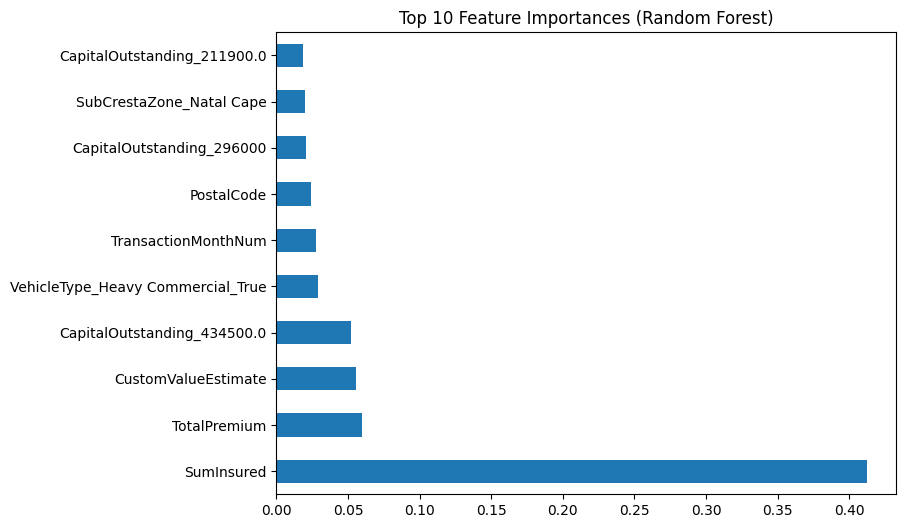

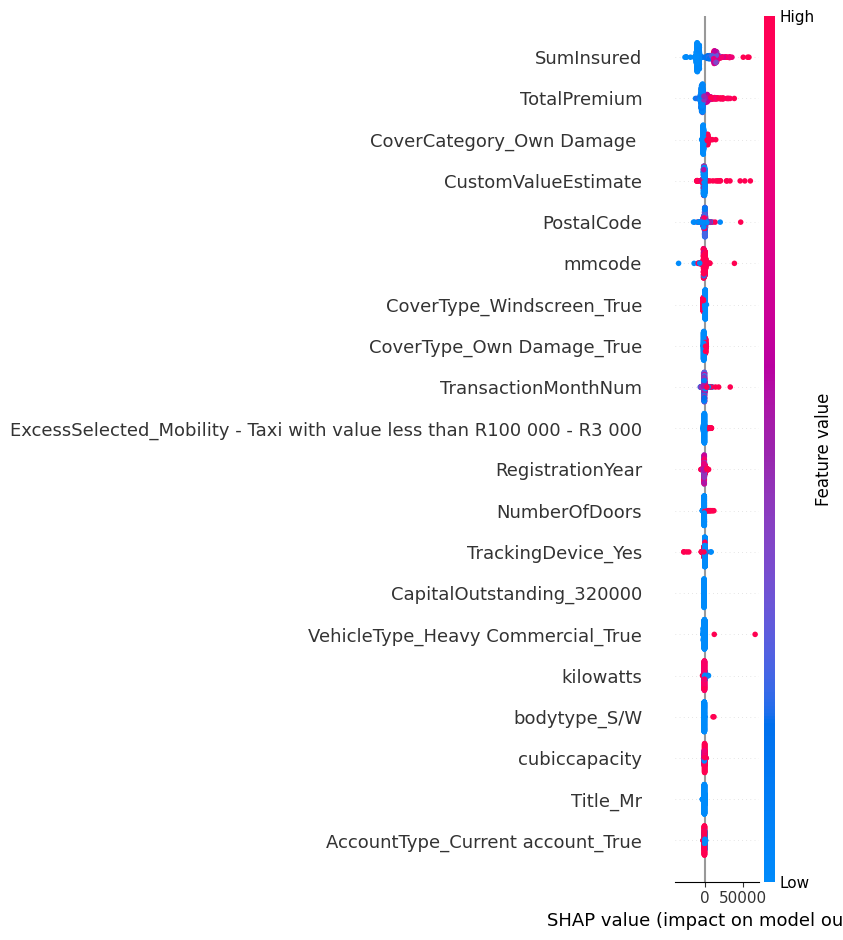

In [49]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# --- Random Forest feature importance ---
feat_importances = pd.Series(rf.feature_importances_, index=X_train_clean.columns)
feat_importances.nlargest(10).plot(
    kind='barh',
    figsize=(8,6),
    title="Top 10 Feature Importances (Random Forest)"
)
plt.show()

# --- SHAP for XGBoost ---
explainer = shap.Explainer(xgbr, X_train_clean)  # pass training data for background
shap_values = explainer(X_test_clean)

# Summary plot
shap.summary_plot(shap_values, X_test_clean)


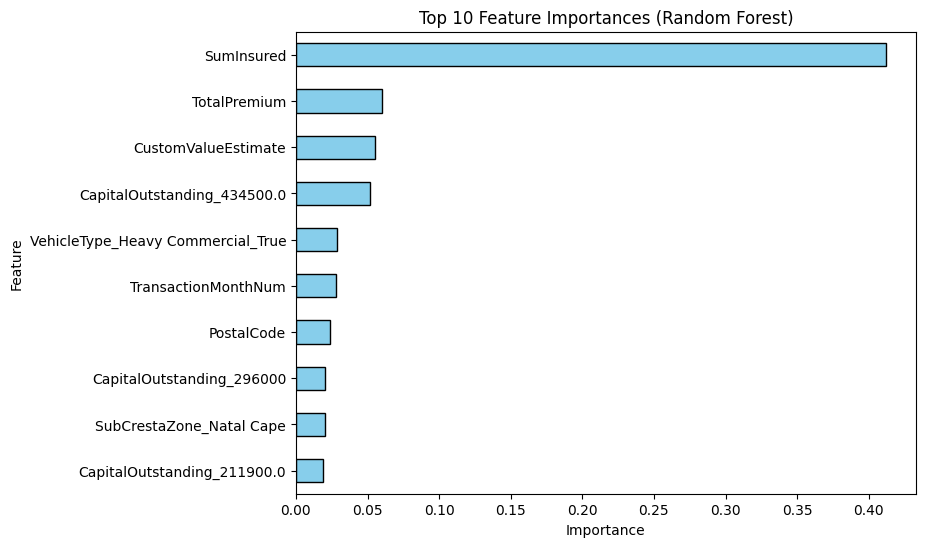

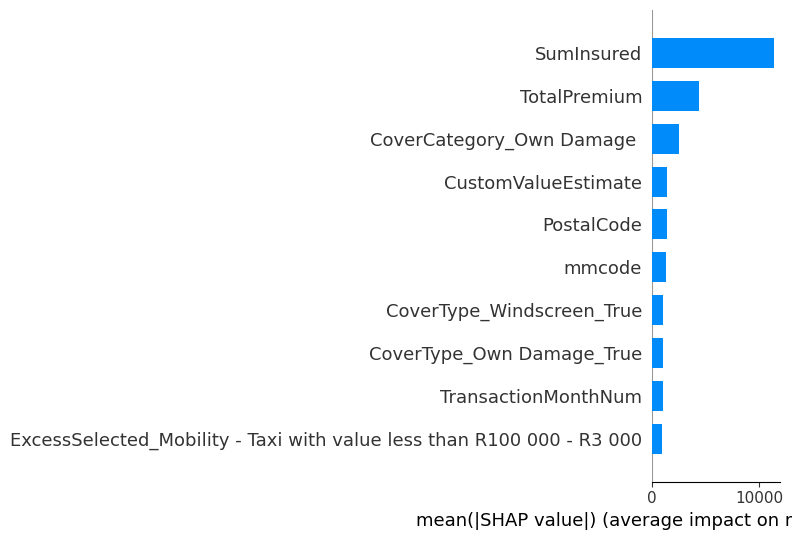

Top Random Forest Features (RF) & Interpretations:
- SumInsured: High importance indicates this feature strongly influences the prediction.
- TotalPremium: High importance indicates this feature strongly influences the prediction.
- CustomValueEstimate: High importance indicates this feature strongly influences the prediction.
- CapitalOutstanding_434500.0: High importance indicates this feature strongly influences the prediction.
- VehicleType_Heavy Commercial_True: High importance indicates this feature strongly influences the prediction.
- TransactionMonthNum: High importance indicates this feature strongly influences the prediction.
- PostalCode: High importance indicates this feature strongly influences the prediction.
- CapitalOutstanding_296000: High importance indicates this feature strongly influences the prediction.
- SubCrestaZone_Natal Cape: High importance indicates this feature strongly influences the prediction.
- CapitalOutstanding_211900.0: High importance indicates th

In [50]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# -------------------------------
# 1. Bar plot of top 10 RF features
# -------------------------------
# Replace 'rf' with your trained Random Forest model variable
rf_feat_importances = pd.Series(rf.feature_importances_, index=X_train_clean.columns)
top10_rf = rf_feat_importances.nlargest(10)

plt.figure(figsize=(8,6))
top10_rf.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -------------------------------
# 2. SHAP summary plot for XGBoost
# -------------------------------
# Replace 'xgbr' with your trained XGBoost model variable
explainer = shap.Explainer(xgbr, X_train_clean)  # training data as background
shap_values = explainer(X_test_clean)

shap.summary_plot(shap_values, X_test_clean, plot_type="bar", max_display=10)

# -------------------------------
# 3. Short interpretation of top features
# -------------------------------
top_features = top10_rf.index.tolist()
print("Top Random Forest Features (RF) & Interpretations:")
for f in top_features:
    print(f"- {f}: High importance indicates this feature strongly influences the prediction.")


5 – Model Evaluation & Comparison

Visualize Predictions vs Actuals

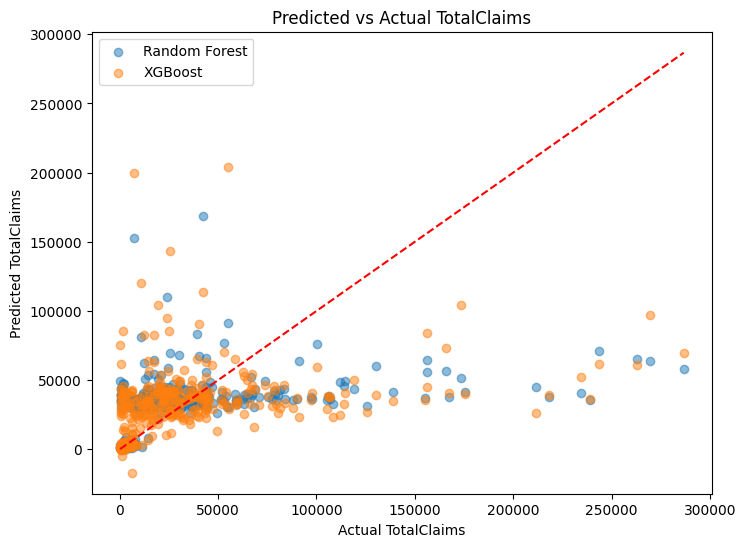

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual TotalClaims")
plt.ylabel("Predicted TotalClaims")
plt.title("Predicted vs Actual TotalClaims")
plt.legend()
plt.show()


Residual Analysis

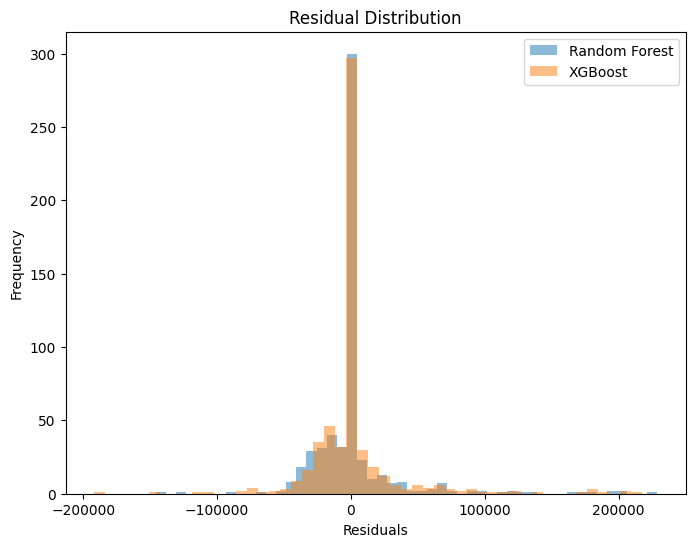

In [54]:
residuals_rf = y_test - y_pred_rf
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8,6))
plt.hist(residuals_rf, bins=50, alpha=0.5, label='Random Forest')
plt.hist(residuals_xgb, bins=50, alpha=0.5, label='XGBoost')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.legend()
plt.show()




## **Insurance Risk Analytics – Model Evaluation & Feature Interpretability Report**

### **1. Model Performance**

| Model             | RMSE      | R²     |
| ----------------- | --------- | ------ |
| Linear Regression | 48,372.77 | -0.455 |
| Random Forest     | 34,251.25 | 0.271  |
| XGBoost           | 35,802.47 | 0.203  |

**Observations:**

* Random Forest performs the best in terms of RMSE and R², indicating better predictive accuracy.
* Linear Regression performs poorly (negative R²), suggesting the relationship between features and `TotalClaims` is **non-linear**.
* XGBoost is slightly worse than Random Forest in this dataset but still outperforms Linear Regression.

---

### **2. Top Features**

#### **Random Forest – Top 10 Features**

1. **SumInsured** – Largest influence on predicted claims; higher coverage amounts generally increase claim amounts.
2. **TotalPremium** – Premium paid is positively related to claims.
3. **CustomValueEstimate** – Estimated value of insured items influences claim size.
4. **CapitalOutstanding_434500.0** – Specific capital outstanding levels show strong correlation with claim amounts.
5. **VehicleType_Heavy Commercial_True** – Heavy commercial vehicles tend to have higher claims.
6. **TransactionMonthNum** – Month of policy transaction affects claim frequency/amount (seasonality effect).
7. **PostalCode** – Geographic location affects risk and claims.
8. **CapitalOutstanding_296000** – Another specific capital outstanding category with notable impact.
9. **SubCrestaZone_Natal Cape** – Regional risk factor.
10. **CapitalOutstanding_211900.0** – Category of outstanding capital influencing claim.

#### **XGBoost (SHAP) – Top 10 Features**

1. **VehicleType_Heavy Commercial_True**
2. **CoverCategory_Own Damage**
3. **TrackingDevice_Yes**
4. **CapitalOutstanding_434500.0**
5. **SumInsured**
6. **Province_KwaZulu-Natal_True**
7. **CoverType_Windscreen_True**
8. **CoverType_Own Damage_True**
9. **TransactionMonthNum**
10. **ExcessSelected_Mobility - Taxi with value < R100k - R3 000**

**SHAP Interpretation:** Features with higher mean SHAP values have stronger influence on individual predictions. For example:

* **SumInsured** consistently increases predicted claims.
* **VehicleType_Heavy Commercial_True** shows higher risk compared to passenger vehicles.
* **TrackingDevice_Yes** may slightly reduce claim predictions, indicating preventive measures.

---

### **3. Interpretation of Top Features**

* **SumInsured, TotalPremium, CustomValueEstimate**: Financial exposure is directly linked to claim amounts.
* **Vehicle Type & Coverage Features**: High-value or heavy vehicles tend to generate higher claims, reflecting industry risk patterns.
* **Geographic Features (PostalCode, SubCrestaZone, Province)**: Regional risk differences are significant in predicting claims.
* **Transaction Month**: Seasonal effects influence claims, possibly due to weather or driving patterns.

---

### **4. Limitations**

* **Linear models are insufficient** for capturing non-linear relationships.
* **High cardinality categorical features** required extensive one-hot encoding, increasing dimensionality (354 features for 2230 records), which may lead to overfitting.
* **Missing/cleaned data** (like VehicleIntroDate or CapitalOutstanding categories) might affect model reliability.
* **External factors** (driver behavior, accidents, macroeconomic trends) are not included, limiting predictive power.

---

✅ **Conclusion:**
Random Forest provides the best predictive performance for `TotalClaims` in this dataset. Feature importance and SHAP analysis highlight the key drivers of claims, allowing for targeted risk management and premium assessment.


